# Проект

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Описание данных:

**Данные для первой части**

Файл /datasets/hypothesis.csv

Hypothesis — краткое описание гипотезы;   
Reach — охват пользователей по 10-балльной шкале;   
Impact — влияние на пользователей по 10-балльной шкале;   
Confidence — уверенность в гипотезе по 10-балльной шкале;   
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.   

**Данные для второй части**

Файл /datasets/orders.csv

transactionId — идентификатор заказа;   
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;   
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ. 

Файл /datasets/visitors.csv
  
date — дата;  
group — группа A/B-теста;   
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  


## Часть 1. Приоритизация гипотез.

### Обзор и обработка данных 'hypothesis'

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# посмотрим что покажет info

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков нет, все значения баллов в integer

In [4]:
#преобразуем название столбцов к нижнему регистру 

hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

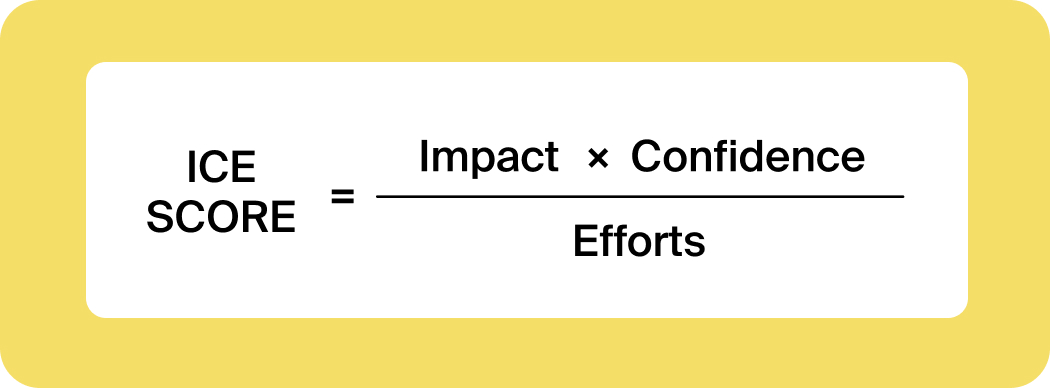

In [5]:
#Добавим столбец "ICE"

hypothesis['ICE']=(hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


In [6]:
#Отсортируем по убыванию приоритета, выведем только столбцы "hypothesis" и "ICE"

print(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Самые перспективные гипотезы по ICE:    
8,0,7.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

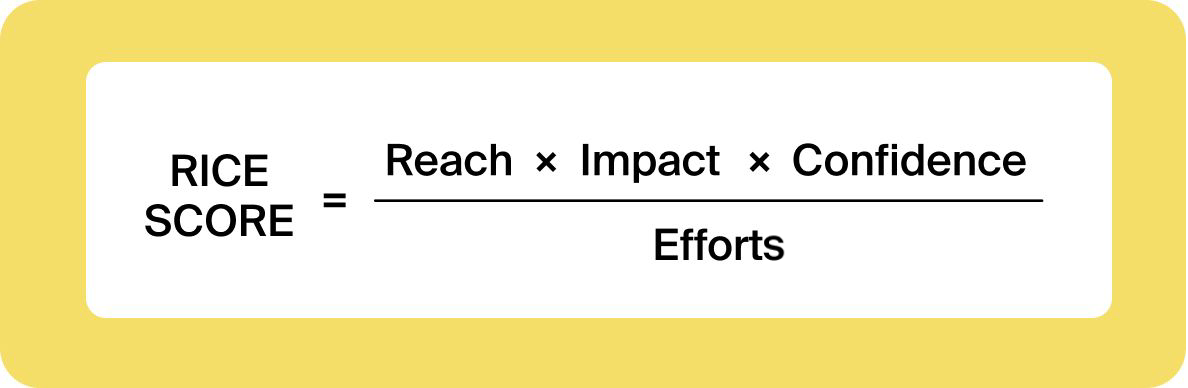

In [7]:
#Добавим столбец "RICE"

hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


In [8]:
#Отсортируем по убыванию приоритета, выведем только столбцы "hypothesis" и "RICE"

print(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Самые перспективные гипотезы по RICE:    
7,2,0.

### Как изменилась приоритизация гипотез при применении RICE вместо ICE?

- Самые перспективные гипотезы по ICE:
   8,0,7.

- Самые перспективные гипотезы по ICE:
   7,2,0.

- В обоих способах присутствуют гипотезы **2 и 7**.    

- "RICE" это модификация метода "ICE", по этому большую приоритизацию будет иметь та гипотеза, в которой значение "reach"(охват пользователей по 10-балльной шкале) больше остальных. В 7 гипотеза она максимальна 

## Часть 2. Анализ A/B-теста

### Обзор и обработка данных

#### orders

In [9]:
#откроем orders и visitors

orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [10]:
# Рассмотрим таблицу с заказами:
display(orders.head(5))
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

- Пропусков нет
- Необходимо переименовать столбцы 	transactionId и visitorId
- Изменим тип "date" на datetime

In [11]:
# переименуем столбцы

orders = orders.rename(
columns={
'transactionId': 'transaction_id',
'visitorId': 'visitor_id',
}
)
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [12]:
# изменим тип на datetime

orders['date']= pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.dtypes                                 

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

In [13]:
print('Начало теста:', orders['date'].min())
print('Окончание теста:', orders['date'].max())

Начало теста: 2019-08-01 00:00:00
Окончание теста: 2019-08-31 00:00:00


#### visitors

In [14]:
# Рассмотрим таблицу с пользователями:
display(visitors.head(5))
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

- Пропусков нет
- Изменим тип "date" на datetime

In [15]:
# изменим тип на datetime

visitors['date']= pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.dtypes 

date        datetime64[ns]
group               object
visitors             int64
dtype: object

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [16]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates() 

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated.head(10))

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [17]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated.head(10))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [18]:
# объединяем кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


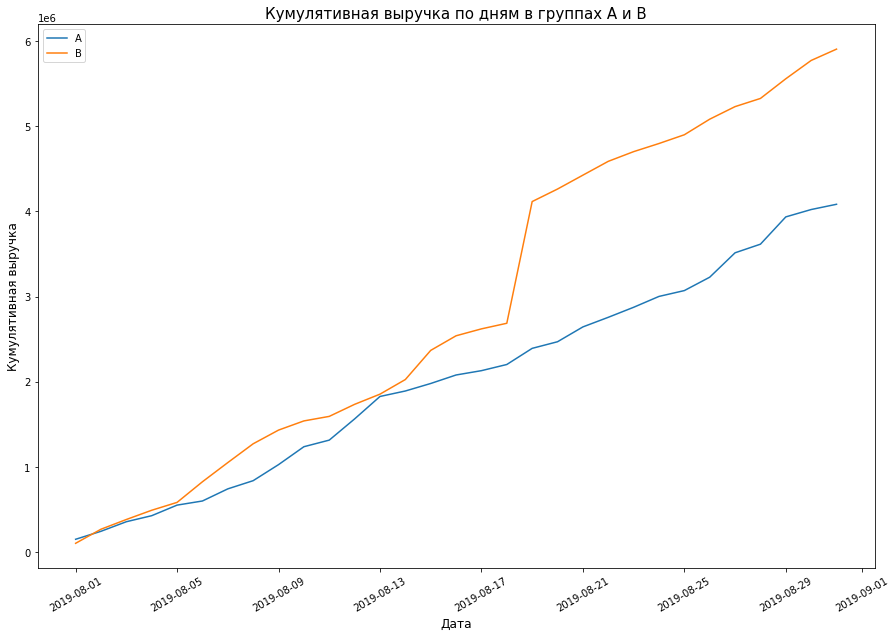

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
# Строим график выручки группы B
plt.figure(figsize=(15,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 

**Вывод**

- Выручка в группе А почти равномерно увеличивается на протяжении всего теста. 
- Выручка в группе В также увеличивается, но с заметным скачком почти в середине теста. Возможно, имело место большое количество заказов в группе В или же всплеск их стоимости.
- Почти на всём протяжении теста кумулятивная выручка в группе В больше, чем в А.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

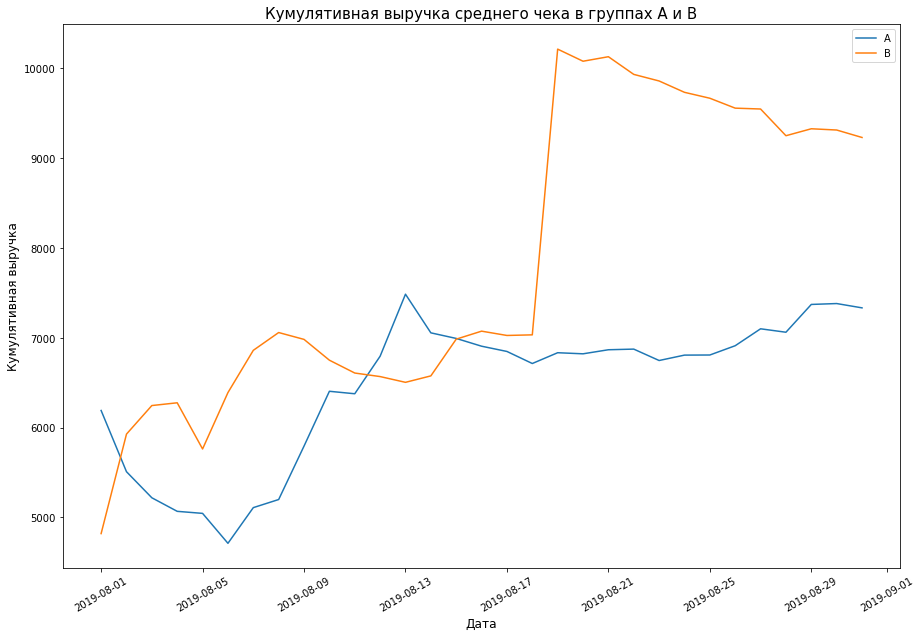

In [20]:
plt.figure(figsize=(15,10))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивная выручка среднего чека в группах А и В', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 


**Вывод**

- Средний чек в группе А выравнивается к середине теста. 
- Средний чек в группе B идет скачками, заметен сильный скачек в середине теста. скорей всего были сделаны дорогие покупки в это время.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

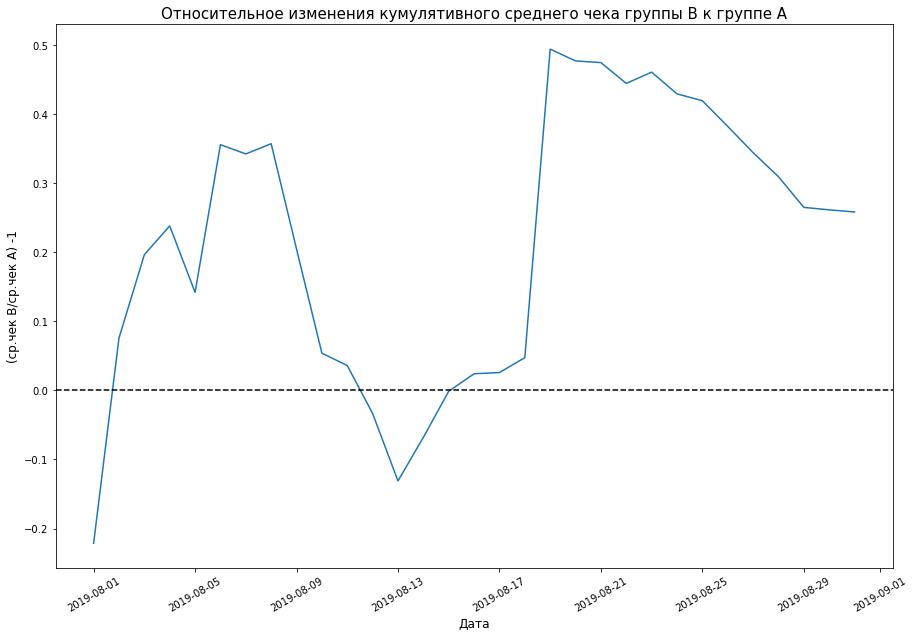

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,10))
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.xticks(rotation=30)
 

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 


**Вывод**

- В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! 

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

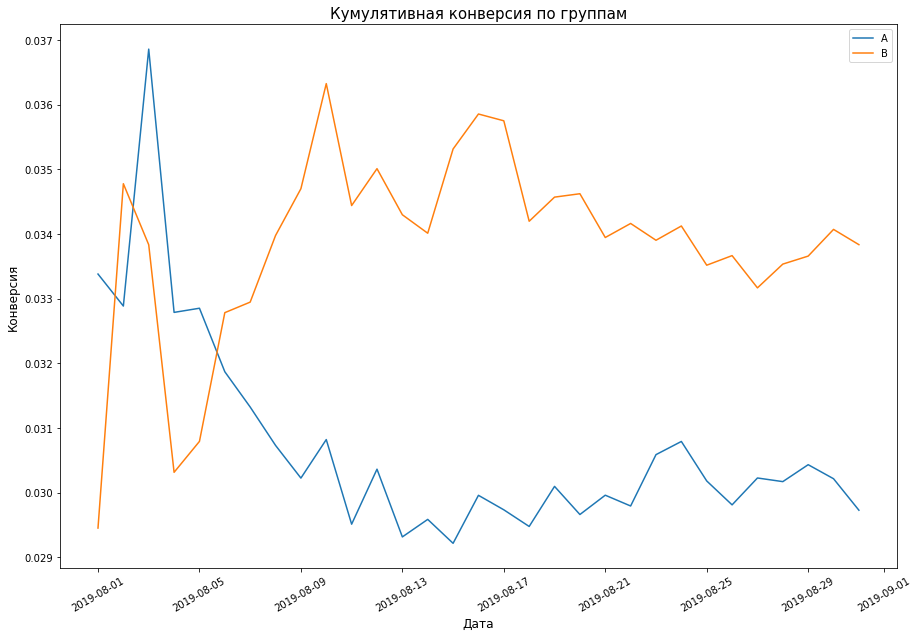

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()




**Вывод**

- Сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А. 

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

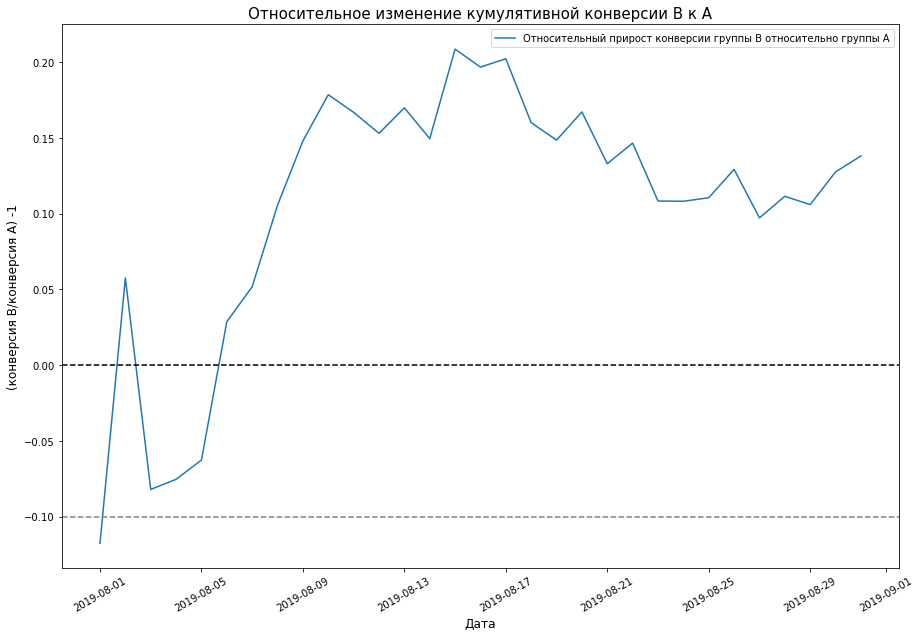

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

**Вывод**

- Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше.
- На графике есть скачки, которые могут говорить о наличии выбросов в данных.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

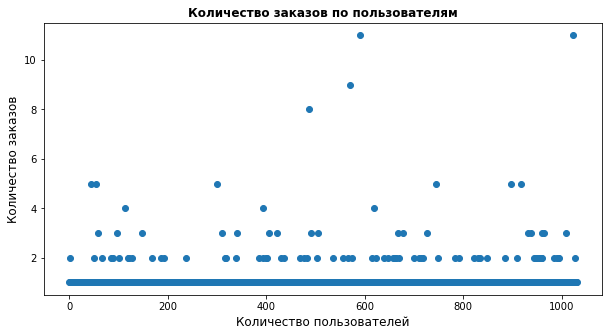

In [24]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.scatter(x_values, ordersByUsers['orders']) 

plt.show()

**Вывод**

- Много пользователей с 2-3 заказами. Нужно определить их точную долю, чтобы понять можно ли считать их выбросами или нет.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Вывод**

- Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше.
- На графике есть скачки, которые могут говорить о наличии выбросов в данных.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

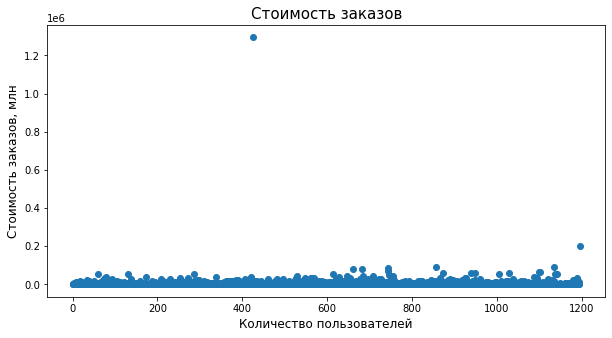

In [26]:
plt.figure(figsize=(10,5))
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Стоимость заказов, млн', fontsize=12)
plt.title('Cтоимость заказов', fontsize=15)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

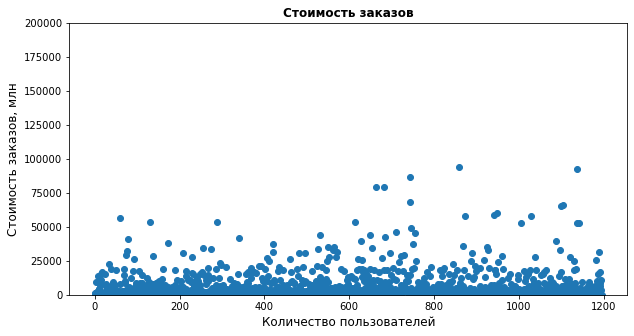

In [27]:
# уменьшим выборку до 200тыс

plt.figure(figsize=(10,5))
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Стоимость заказов, млн', fontsize=12)
plt.title('Cтоимость заказов', fontsize=15)
plt.ylim(0, 200000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

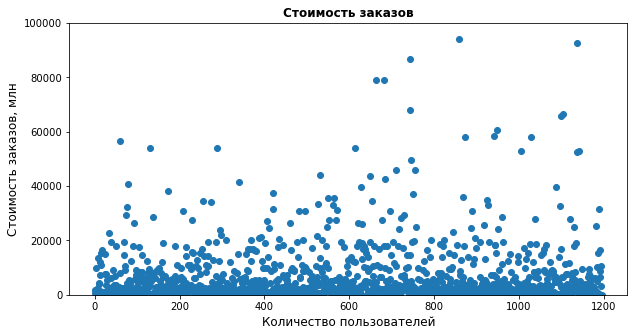

In [28]:
# даже до 100тыс, глядя на предыдущий график

plt.figure(figsize=(10,5))
plt.ylabel('Стоимость заказов, млн', fontsize=12)
plt.xlabel('Количество пользователей', fontsize=12)
plt.title('Cтоимость заказов', fontsize=15)
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

In [29]:
display(orders['revenue'].describe())

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

**Вывод**

- В данных оказался один очень крупный заказ (~1.3 млн. руб.), который существенно влияет на результаты теста.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод**

- Не более 5% заказов дороже 28 000 руб. и не более 1% дороже 58 233 руб.
- Примем **30 000 руб.** за верхнюю границу стоимости заказа.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [31]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [32]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [33]:
# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы:   
- Нулевая: различий конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

In [34]:
# Функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_significance(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный выигрыш/проигрыш В к А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

In [35]:
stat_significance(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 13.8%


**Вывод**

- По не очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница. Так как P-value меньше 5% 
- Также относительный прирост конверсии группы В равен 13.8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:   
- Нулевая: различий в среднем чеке заказа между группами нет.
- Альтернативная: различия в среднем чеке заказа группами есть.

In [36]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: 25.9%


**Вывод**

- Так как P-value > 0.05, нет оснований считать, что средний чек группы В отличается от среднего чека группы А. Принимаем      нулевую гипотезу
- При этом средний чек группы В выше среднего чека группы А почти на 26%

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [37]:
# Выделим из базы "аномальных" пользователей (совершивших более 3-х заказов или сумма заказа которых > 30000):

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print()
print('\033[1m', 'Количество "аномальных" пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64

 Количество "аномальных" пользователей: 57


In [38]:
# Создадим списки с числом заказов каждого пользователя, включая нули, но уже по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

Сформулируем гипотезы:   
- Нулевая: различий конверсии между группами по очищенным данным нет.
- Альтернативная: различия в конверсии между группами по очищенным данным есть.

In [39]:
stat_significance(sampleAFiltered, sampleBFiltered)

P-value: 0.022
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 14.2%


**Вывод по очищенным**

- По очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница. Так как P-value меньше 5% 
- Относительный прирост конверсии группы В равен 14.2%

**Вывод по не очищенным**

- По не очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница. Так как P-value меньше 5% 
- Также относительный прирост конверсии группы В равен 13.8%

**Вывод общий**

- P-value < 0.05, между конверсиями групп А и В есть статистически значимая разница.
- После удаления выбросов, прирост конверсии группы B остался на том же уровне, порядка 14% в обоих случаях



### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:   
- Нулевая: различий в среднем чеке заказа между группами по очищенным данным нет.
- Альтернативная: различия в среднем чеке заказа между группами по очищенным данным есть.

In [40]:
(stat_significance(
    orders[(orders['group']=='A') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.958
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: -2.0%


**Вывод по очищенным данным**

- Так как P-value > 0.05, нет оснований считать, что средний чек группы В отличается от среднего чека группы А. Принимаем      нулевую гипотезу
- По очищенным данным, средний чек группы В относительно А ниже на 2%

**Вывод по не очищенным данным**

- Так как P-value > 0.05, нет оснований считать, что средний чек группы В отличается от среднего чека группы А. Принимаем      нулевую гипотезу
- При этом средний чек группы В выше среднего чека группы А почти на 26%

**Вывод общий**

- P-value > 0.05, нет оснований считать, что средний чек группы В отличается от среднего чека группы А.
- После удаления выбросов, средний чек А стал выше B


### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

- И по "сырым" и по очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница. Конверсия группы В выше, чем в А, на 14-15%
- И по "сырым" и по очищенным данным нет оснований считать, что средний чек группы В отличается от среднего чека группы А.
- График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным - **фиксируем победу группы В**. Средний чек выше не стал, зато значительно увеличилась конверсия.